In [1]:
# Importing libraries 

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/sample_data/Melbourne_housing_FULL.csv')
# Displaying first five records of datset

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Displays dimension of the dataset i.e no. of rows and columns

df.shape

(34857, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# Describe the dataset

df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [6]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')
Categorical columns: 
 Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


# 4.Data Pre-processing

Cleaning / Filling Missing Data
Pandas provides various methods for cleaning the missing values.
The fillna function can “fill in” NA values with non-null data in a couple of ways



*   Replace NaN with a Scalar Value

*   Replacing "NaN" with "0".

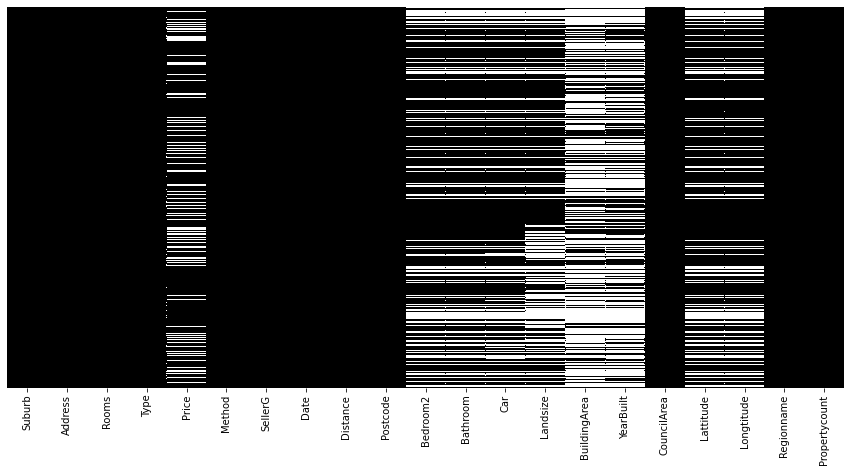

In [7]:
# Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [8]:

df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


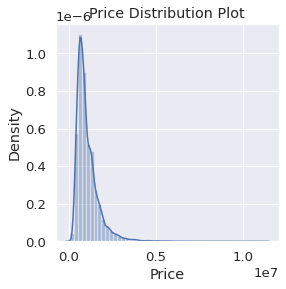

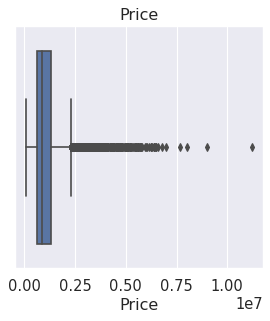

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
plt.title('Price Distribution Plot')
sns.distplot(df['Price'])

# Let's check the distribution of y variable
plt.figure(figsize=(4,4), dpi= 80)
sns.boxplot(df['Price'])
plt.title('Price')
plt.show()

# Removing Null values

In [10]:
#separate the numeric columns from the categorical columns

# select numerical columns
data_numeric = df.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
# select non-numeric columns
data_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

In [11]:
data_numeric = data_numeric.drop(columns='Postcode')
data_numeric = data_numeric.drop(columns='BuildingArea')
data_numeric = data_numeric.drop(columns='YearBuilt')
data_numeric.head()


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0


In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_numeric = pd.DataFrame(imputer.fit_transform(data_numeric),columns = data_numeric.columns)

In [13]:
data_numeric.isna().any()

Rooms            False
Price            False
Distance         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
Lattitude        False
Longtitude       False
Propertycount    False
dtype: bool

# Removing Outliers

In [14]:
# Importing
import sklearn
import pandas as pd


''' Detection '''
# IQR
Q1 = np.percentile(data_numeric ['Price'], 25, interpolation = 'midpoint')

Q3 = np.percentile(data_numeric ['Price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print (IQR)
print("Old Shape: ", data_numeric.shape)

# Upper bound
upper = np.where(data_numeric['Price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_numeric['Price'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
data_numeric.drop(upper[0], inplace = True)
data_numeric.drop(lower[0], inplace = True)

print("New Shape: ", data_numeric.shape)


670000.0
Old Shape:  (34857, 10)
New Shape:  (33184, 10)


In [15]:
data_numeric.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2.0,848600.0,2.5,2.0,1.0,1.0,126.0,-37.8014,144.9958,4019.0
1,2.0,1480000.0,2.5,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0
2,2.0,1035000.0,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0
3,3.0,1122600.0,2.5,3.0,2.0,1.0,0.0,-37.8114,145.0116,4019.0
4,3.0,1465000.0,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


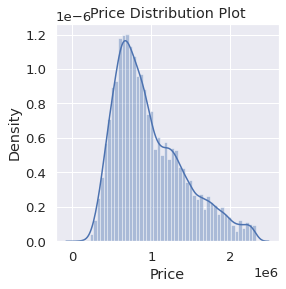

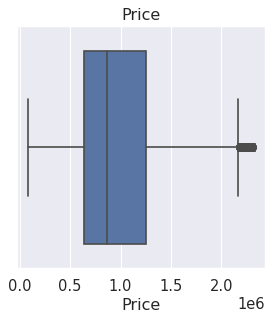

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
plt.title('Price Distribution Plot')
sns.distplot(data_numeric['Price'])

# Let's check the distribution of y variable
plt.figure(figsize=(4,4), dpi= 80)
sns.boxplot(data_numeric['Price'])
plt.title('Price')
plt.show()

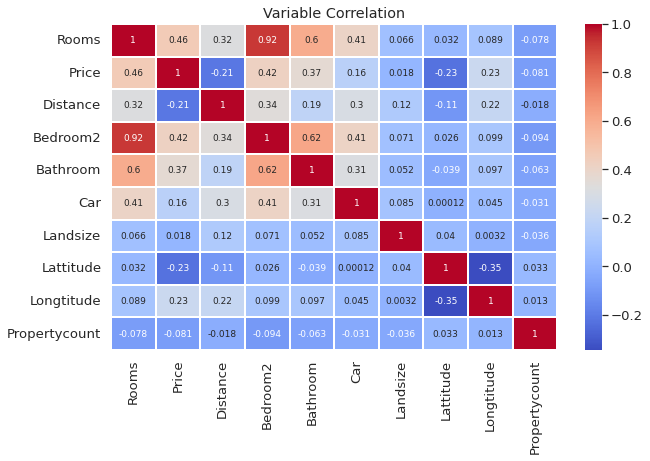

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(data_numeric.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')
plt.show()

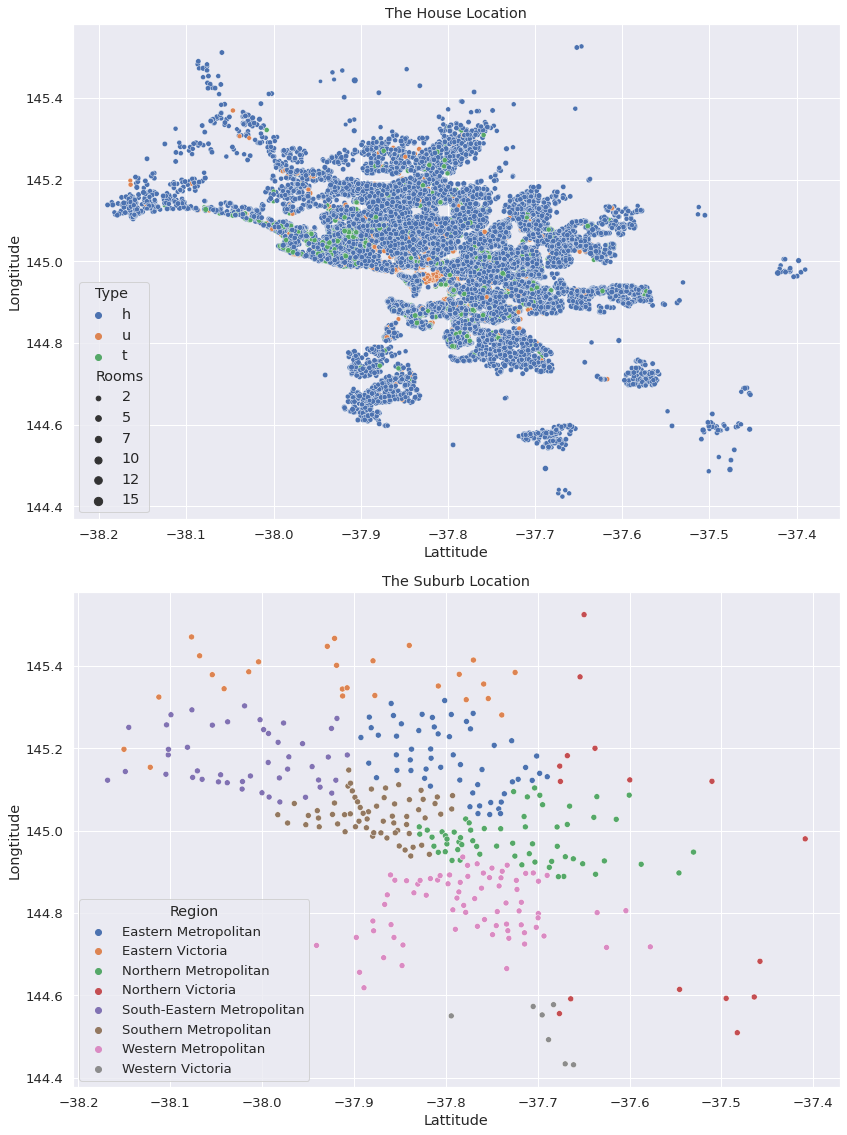

In [18]:
dl = df[['Regionname', 'Suburb', 'Price', 'Lattitude', 'Longtitude']].groupby(by=['Regionname', 'Suburb']).mean()
dl_region = [i for i, j in dl.index]
dl_suburb = [j for i, j in dl.index]

dl['Region'] = dl_region
dl['Suburb'] = dl_suburb
dl = dl.reset_index(drop=True)

fig, ax = plt.subplots(2, 1, figsize=(12, 16))
sns.scatterplot(data=df, x='Lattitude', y='Longtitude', hue='Type', size='Rooms', ax=ax[0])
ax[0].set_title('The House Location')
sns.scatterplot(data=dl, x='Lattitude', y='Longtitude', hue='Region', ax=ax[1])
ax[1].set_title('The Suburb Location')
plt.tight_layout()

In [19]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

melb_target = data_numeric.Price
melb_predictors = data_numeric.drop(['Price'], axis=1)



In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(melb_predictors, 
                                                    melb_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [21]:
print (len(X_train))
print (len(X_test))

23228
9956


In [42]:
from sklearn.preprocessing import StandardScaler

# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = RandomForestRegressor(n_jobs=-1)

In [50]:
estimators = np.arange(10, 200, 10)
#scores = []
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
   #model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #scores.append(model.score(X_test, y_test))
    return mean_absolute_error(y_test, preds)

In [51]:
print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(X_train, X_test, y_train, y_test))

Mean Absolute Error from Imputation while Track What Was Imputed:
146431.4398370782


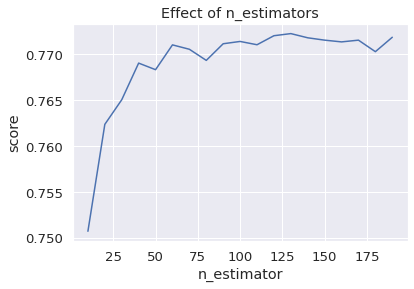

In [52]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [55]:
model.score(X_train,y_train)

0.9662245645232368

In [56]:
model.score(X_test,y_test)

0.7718370072314759

In [58]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [60]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7718370072314759


In [102]:
model.predict(z)

array([1596578.94736842])